In [1]:
import numpy as np
import pandas as pd

In [2]:
catboost = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_catboost_16.csv')
print(len(catboost[catboost['fraud_ind']==1]))

xgboost = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_xgboost_7.csv')
print(len(xgboost[xgboost['fraud_ind']==1]))

lightgbm_kaggle = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_lightgbm_vote.csv')
print(len(lightgbm_kaggle[lightgbm_kaggle['fraud_ind']==1]))

lightgbm_jeff = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_Jeff_672959.csv')
print(len(lightgbm_jeff[lightgbm_jeff['fraud_ind']==1]))

lightgbm_spw = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_lightgbm_scale_pos_weight_vote.csv')
print(len(lightgbm_spw[lightgbm_spw['fraud_ind']==1]))

lightgbm_dae = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_V.csv')
print(len(lightgbm_dae[lightgbm_dae['fraud_ind']==1]))

lightgbm_V9 = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_lightgbm_V9.csv')
print(len(lightgbm_V9[lightgbm_V9['fraud_ind']==1]))

NN = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_NN2.csv')
NN['fraud_ind'] = (NN.fraud_ind > 0.36).astype(int)
print(len(NN[NN['fraud_ind']==1]))

6575
6192
5941
6358
6171
5058
6108
8097


In [3]:
sub = lightgbm_kaggle.copy()
sub.fraud_ind = lightgbm_V9.fraud_ind + lightgbm_jeff.fraud_ind + lightgbm_dae.fraud_ind#*0.5 + lightgbm_spw.fraud_ind*0.5
print(sub['fraud_ind'].value_counts())

print('--------------------------------------------------------------')
sub['fraud_ind'] = np.where(sub['fraud_ind']>=1, 1, 0)
print(sub['fraud_ind'].value_counts())

0    414474
3      4647
1      1505
2      1039
Name: fraud_ind, dtype: int64
--------------------------------------------------------------
0    414474
1      7191
Name: fraud_ind, dtype: int64


In [4]:
df = np.array([sub.fraud_ind, catboost.fraud_ind, xgboost.fraud_ind, NN.fraud_ind])

np.corrcoef(df)

array([[1.        , 0.82007453, 0.89834971, 0.70218255],
       [0.82007453, 1.        , 0.82995266, 0.71703272],
       [0.89834971, 0.82995266, 1.        , 0.68025878],
       [0.70218255, 0.71703272, 0.68025878, 1.        ]])

In [5]:
sub.fraud_ind = sub.fraud_ind*0.5 + catboost.fraud_ind*0.15 + xgboost.fraud_ind*0.3 + NN.fraud_ind*0.15

In [6]:
print(sub['fraud_ind'].value_counts())

0.00    411212
1.10      4517
0.15      2651
0.80       766
0.95       746
0.30       527
0.50       474
0.65       417
0.95       271
0.45        53
0.60        31
Name: fraud_ind, dtype: int64


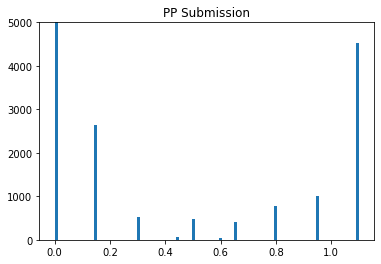

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(sub['fraud_ind'],bins=100)
plt.ylim((0,5000))
plt.title('PP Submission')
plt.show()

In [8]:
print(len(sub[sub['fraud_ind']>=.4]))
sub['fraud_ind'] = (sub.fraud_ind >= .4).astype(int)

7275


In [ ]:
sub.to_csv('E-Sun_Credit_Card_Fraud_Detection_submission_PostProcess16.csv')